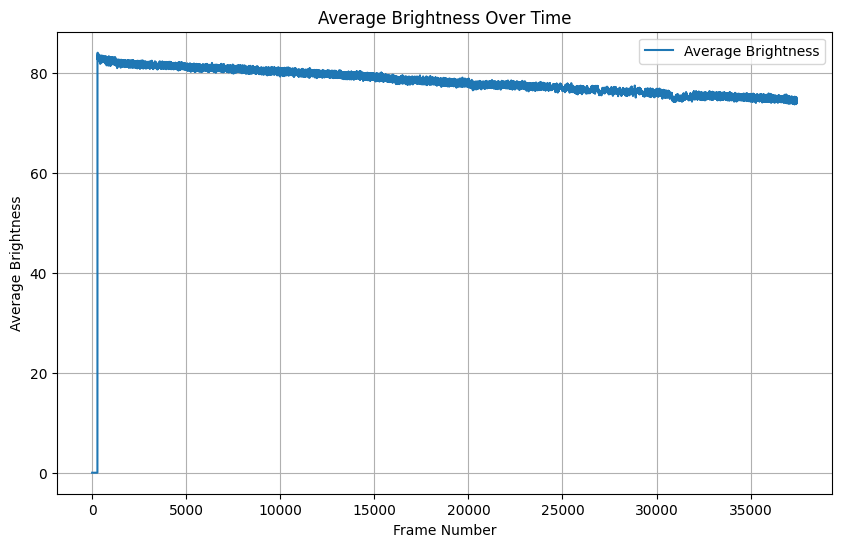

(37169, [37169])

<Figure size 640x480 with 0 Axes>

In [1]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to the video file
video_path = r'C:\Users\huang\Desktop\test1.avi'  # Replace with the correct path to your video file

# Open the video file
cap = cv2.VideoCapture(video_path)

# Check if the video was opened successfully
if not cap.isOpened():
    raise IOError("Error: Could not open video.")

# List to hold the average brightness of each frame
brightness_values = []

# Loop through each frame of the video
while True:
    ret, frame = cap.read()
    
    if not ret:
        break
    
    # Convert the frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Calculate the average brightness
    average_brightness = np.mean(gray_frame)
    
    # Append the average brightness to the list
    brightness_values.append(average_brightness)

# Release the video capture object
cap.release()

# Plot the average brightness over time
plt.figure(figsize=(10, 6))
plt.plot(brightness_values, label='Average Brightness')
plt.xlabel('Frame Number')
plt.ylabel('Average Brightness')
plt.title('Average Brightness Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Save the plot as an image file
plt.savefig('average_brightness_plot.png')

# Define a threshold to determine if the LED is on (adjust if needed)
threshold = 10  # Example threshold, adjust if needed

# Calculate the number of consecutive frames where the LED is on
light_on_segments = []
current_segment_length = 0

for brightness in brightness_values:
    if brightness > threshold:
        current_segment_length += 1
    else:
        if current_segment_length > 0:
            light_on_segments.append(current_segment_length)
        current_segment_length = 0

# If the last segment reaches the end of the video
if current_segment_length > 0:
    light_on_segments.append(current_segment_length)

# Sum the lengths of all segments to get the total number of frames where the LED is on
total_light_on_frames = sum(light_on_segments)

# Output the brightness values, path to the saved plot, and total light on frames
total_light_on_frames, light_on_segments
